# `shadowhand-gym` code example

## Install `shadowhand-gym`
You need to install `shadowhand-gym` from source for now.

In [ ]:
# Download the repository
!git clone https://github.com/szahlner/shadowhand-gym.git

# Install the module
!pip install -e shadowhand-gym

# Set it as current directory
%cd "shadowhand-gym"

fatal: destination path 'shadowhand-gym' already exists and is not an empty directory.
Obtaining file:///content/shadowhand-gym
  Preparing metadata (setup.py) ... done
  Attempting uninstall: shadowhand_gym
    Found existing installation: shadowhand_gym 1.0.0
    Uninstalling shadowhand_gym-1.0.0:
      Successfully uninstalled shadowhand_gym-1.0.0
  Running setup.py develop for shadowhand_gym
/content/shadowhand-gym


## Interact

In [ ]:
import os
# Choose the right backend for your system: use "egl" if you have a GPU, "osmesa" otherwise.
os.environ["MUJOCO_GL"] = "egl"
# import gym #old version
import gymnasium as gym #new version
import shadowhand_gym
import gymnasium_robotics

# Create the environment with offscreen rendering enabled
#env = gym.make("ShadowHandReach") #-> NameNotFound: Environment `ShadowHandReach` doesn't exist.
# Environment can be selected from here: https://robotics.farama.org/envs/shadow_dexterous_hand/
# render_mode="rgb_array" to solve the AttributeError marked below(line 14)
env = gym.make("HandReach-v2", render_mode="rgb_array")
state = env.reset()

done = False

# Attempt to render the first frame
  #images = [env.render("rgb_array")] #-> TypeError: Wrapper.render() takes 1 positional argument but 2 were given
images = [env.render()] #-> AttributeError: Unexpected mode: None, expected modes: human, rgb_array, depth_array, or rgbd_tuple


# Here you might meet classic FatalError: gladLoadGL error. You should download MuJoCo 2.1.5 or above to fix this issue.
#(https://github.com/google-deepmind/dm_control/issues/283)

while not done:
    # Random action
    action = env.action_space.sample()
    #state, reward, done, info = env.step(action) #-> ValueError: too many values to unpack (expected 4)
    state, reward, terminated, truncated, info = env.step(action) #new update version
    #images.append(env.render("rgb_array")) #->TypeError: Wrapper.render() takes 1 positional argument but 2 were given
    done = terminated or truncated

    frame = env.render()
    images.append(frame)

env.close()


## Convert and show an animation (apng)

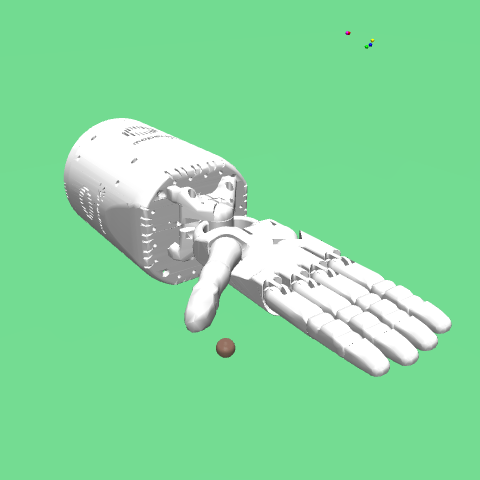

In [ ]:
!pip3 install numpngw
from numpngw import write_apng
from IPython.display import Image

# Convert to apng
write_apng("animation.png", images, delay=40)

# Show animation
Image(filename="animation.png")